**Install the necessary libraries**

In [ ]:
!pip install newsapi-python
!pip install nltk
!pip install scikit-learn

**Import libraries**

In [ ]:
from newsapi import NewsApiClient
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Setup API and Fetch Data**

In [ ]:
# Replace 'Your_API_Key_Here' with your actual NewsAPI key
newsapi = NewsApiClient(api_key='bca996d07c1842d7846eb24ae94d8bea')

# Fetch articles for different categories
tech_articles = newsapi.get_everything(q='tech', language='en', page_size=100)
entertainment_articles = newsapi.get_everything(q='entertainment', language='en', page_size=100)
business_articles = newsapi.get_everything(q='business', language='en', page_size=100)
sports_articles = newsapi.get_everything(q='sports', language='en', page_size=100)
politics_articles = newsapi.get_everything(q='politics', language='en', page_size=100)
travel_articles = newsapi.get_everything(q='travel', language='en', page_size=100)
food_articles = newsapi.get_everything(q='food', language='en', page_size=100)
health_articles = newsapi.get_everything(q='health', language='en', page_size=100)


**Testing Articles are Fetched or Not**

In [ ]:
tech_articles

{'status': 'ok',
 'totalResults': 32342,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Dell Cameron',
   'title': 'Big Tech Squares Off Against US Spies',
   'description': "One of Silicon Valley's most influential lobbying arms joins privacy reformers in a fight against the Biden administration-backed expansion of a major US surveillance program.",
   'url': 'https://www.wired.com/story/iti-section-702-expansion-opposition/',
   'urlToImage': 'https://media.wired.com/photos/661fef9345f4d7f05434b8df/191:100/w_1280,c_limit/GettyImages-2147862639%20(1).jpg',
   'publishedAt': '2024-04-17T18:11:29Z',
   'content': 'A trade organization representing some of the worlds largest information technology companiesGoogle, Amazon, IBM, and Microsoft among themsay its members are voicing strong opposition to ongoing effo… [+3166 chars]'},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Scharon Harding, Ars Technica',
   'title': 'San Francisco’s Train System 

**Data Processing**

In [ ]:
# Convert articles to DataFrame and add a 'category' column
def create_df(articles, category):
    df = pd.DataFrame(articles['articles'])
    df['category'] = category
    return df

categories = ['tech', 'entertainment', 'business', 'sports', 'politics', 'travel', 'food', 'health']
data_frames = [create_df(eval(f"{cat}_articles"), cat.title()) for cat in categories]
df = pd.concat(data_frames)


**Clean Text Data**

In [ ]:
def cleaned_desc_column(text):
    # Cleaning and preprocessing steps
    text = re.sub(r'[,.\'\"!@#$%^&*(){}?/;`~:<>+=-]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

df['news_title'] = df['title'].apply(cleaned_desc_column)


**Train and Evaluate the Model**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['news_title'], df['category'], test_size=0.30, random_state=90)

# Create a pipeline and train the model
lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=1000))
])
lr.fit(X_train, y_train)

# Evaluate the model
y_pred = lr.predict(X_test)
print(f"Accuracy is: {accuracy_score(y_pred, y_test)}")


Accuracy is: 0.49166666666666664


**Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

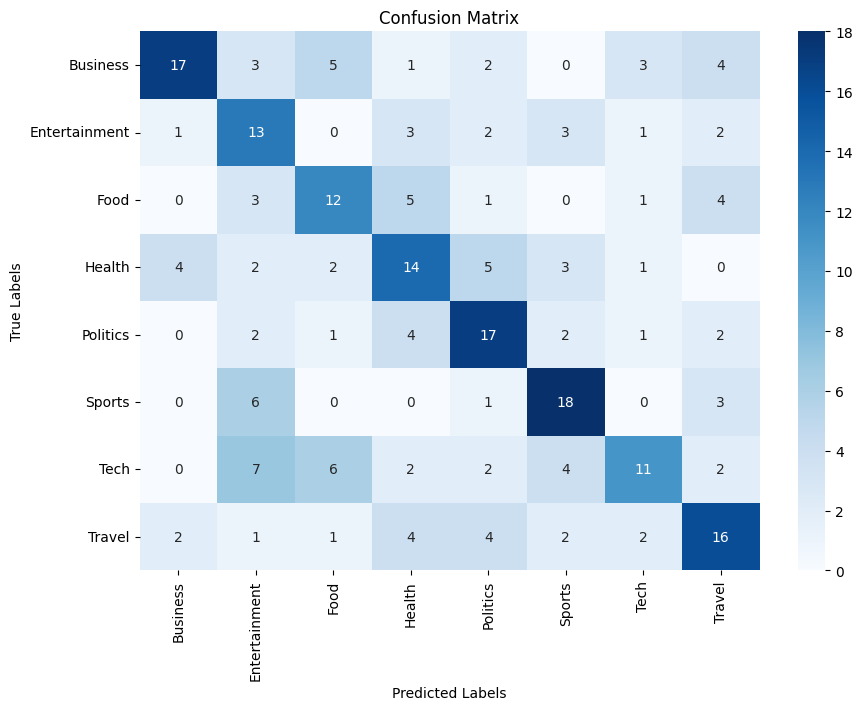

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Test the Model**

In [ ]:
test_articles = ["New Vegan Restaurant Chain Expands Across the United States", "Oscar Winners Announced: Surprising Wins in Major Categories"]
predictions = lr.predict(test_articles)
for article, pred in zip(test_articles, predictions):
    print(f'"{article}" - Predicted Category: {pred}')


"New Vegan Restaurant Chain Expands Across the United States" - Predicted Category: Entertainment
"Oscar Winners Announced: Surprising Wins in Major Categories" - Predicted Category: Politics
